In [1]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [10]:
class AgentState(TypedDict):
    """State for the agent."""
    num1 : int
    num2 : int
    num3 : int
    num4 : int
    operation : str
    operation2 : str
    result: int
    result2 : int
    

In [11]:
def add_node(state: AgentState) -> AgentState:
    """Add two numbers."""
    state['result'] = state['num1'] + state['num2']
    return state

def subtract_node(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state['result'] = state['num1'] - state['num2']
    return state

def add_node2(state: AgentState) -> AgentState:
    """Add two more numbers."""
    state['result2'] = state['num3'] + state['num4']
    return state

def subtract_node2(state: AgentState) -> AgentState:
    """Subtract two more numbers."""
    state['result2'] = state['num3'] - state['num4']
    return state

def decide_next_node(state: AgentState) -> str:
    """Decide the next node based on the operation."""
    if state['operation'] == '+':
        return 'addition'
    elif state['operation'] == '-':
        return 'subtraction'

def decide_next_node2(state: AgentState) -> str:
    """Decide the next node based on the second operation."""
    if state['operation2'] == '+':
        return 'addition2'
    elif state['operation2'] == '-':
        return 'subtraction2'

In [12]:
graph = StateGraph(AgentState)

In [13]:
graph.add_node("router", lambda state: state)
graph.add_node("router2", lambda state: state)
graph.add_node('addition_node', add_node)
graph.add_node('subtraction_node', subtract_node)

graph.add_node('addition2_node', add_node2)
graph.add_node('subtraction2_node', subtract_node2) 

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        #edge : node
        'addition': 'addition_node',
        'subtraction': 'subtraction_node'
    }
)

# graph.add_edge("router", "router2")
graph.add_edge("addition_node", "router2")
graph.add_edge("subtraction_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        #edge : node
        'addition2': 'addition2_node',
        'subtraction2': 'subtraction2_node'
    }
)

graph.add_edge("addition2_node", END)
graph.add_edge("subtraction2_node", END)

In [14]:
app = graph.compile()

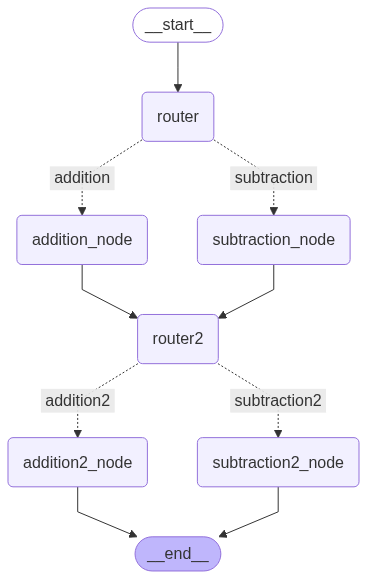

In [15]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
print(app.invoke(AgentState(num1=5, num2=3, num3=10, num4=2, operation='+', operation2='-')))

{'num1': 5, 'num2': 3, 'num3': 10, 'num4': 2, 'operation': '+', 'operation2': '-', 'result': 8, 'result2': 8}
